In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd
import os
os.chdir('/content/drive/My Drive/Colab Notebooks')
!pwd

/content
/content/drive/My Drive/Colab Notebooks


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_excel('Sample - Superstore(1).xlsx')

In [4]:
# Check the level of completeness
print("Completeness:")
print(df.info())


Completeness:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9994 non-null   int64         
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object    

In [5]:
df.shape

(9994, 21)

In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
# Check for inconsistencies
print("\nInconsistencies:")
for column in df.columns:
    print(f"Inconsistencies in {column}: {df[column].nunique()} unique values")


Inconsistencies:
Inconsistencies in Row ID: 9994 unique values
Inconsistencies in Order ID: 5009 unique values
Inconsistencies in Order Date: 1236 unique values
Inconsistencies in Ship Date: 1334 unique values
Inconsistencies in Ship Mode: 4 unique values
Inconsistencies in Customer ID: 793 unique values
Inconsistencies in Customer Name: 793 unique values
Inconsistencies in Segment: 3 unique values
Inconsistencies in Country/Region: 1 unique values
Inconsistencies in City: 531 unique values
Inconsistencies in State: 49 unique values
Inconsistencies in Postal Code: 635 unique values
Inconsistencies in Region: 4 unique values
Inconsistencies in Product ID: 1862 unique values
Inconsistencies in Category: 3 unique values
Inconsistencies in Sub-Category: 17 unique values
Inconsistencies in Product Name: 1849 unique values
Inconsistencies in Sales: 6144 unique values
Inconsistencies in Quantity: 14 unique values
Inconsistencies in Discount: 12 unique values
Inconsistencies in Profit: 7545 u

In [8]:
# Check for redundancies
print("\nRedundancies:")
duplicated_rows = df.duplicated()
print(f"Number of duplicated rows: {duplicated_rows.sum()}")


Redundancies:
Number of duplicated rows: 0


In [9]:
for column in df.columns:
    duplicates_in_column = df.duplicated(subset=column)
    print(f"Duplicates values in {column}: {duplicates_in_column.sum()}")


Duplicates values in Row ID: 0
Duplicates values in Order ID: 4985
Duplicates values in Order Date: 8758
Duplicates values in Ship Date: 8660
Duplicates values in Ship Mode: 9990
Duplicates values in Customer ID: 9201
Duplicates values in Customer Name: 9201
Duplicates values in Segment: 9991
Duplicates values in Country/Region: 9993
Duplicates values in City: 9463
Duplicates values in State: 9945
Duplicates values in Postal Code: 9359
Duplicates values in Region: 9990
Duplicates values in Product ID: 8132
Duplicates values in Category: 9991
Duplicates values in Sub-Category: 9977
Duplicates values in Product Name: 8145
Duplicates values in Sales: 3850
Duplicates values in Quantity: 9980
Duplicates values in Discount: 9982
Duplicates values in Profit: 2449


Customer Database by Segment:
Segment
Consumer       5191
Corporate      3020
Home Office    1783
dtype: int64


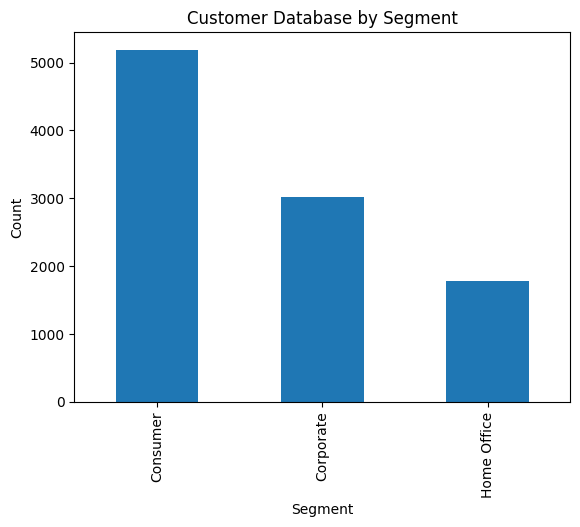

In [ ]:
# Show the customer database by segment
print("Customer Database by Segment:")
print(df.groupby('Segment').size())

# Plot the customer database by segment
df['Segment'].value_counts().plot(kind='bar')
plt.title('Customer Database by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Show the customer database by state
print("Customer Database by State:")
print(df.groupby('State').size())

Customer Database by State:
State
Alabama                   61
Arizona                  224
Arkansas                  60
California              2001
Colorado                 182
Connecticut               82
Delaware                  96
District of Columbia      10
Florida                  383
Georgia                  184
Idaho                     21
Illinois                 492
Indiana                  149
Iowa                      30
Kansas                    24
Kentucky                 139
Louisiana                 42
Maine                      8
Maryland                 105
Massachusetts            135
Michigan                 255
Minnesota                 89
Mississippi               53
Missouri                  66
Montana                   15
Nebraska                  38
Nevada                    39
New Hampshire             27
New Jersey               130
New Mexico                37
New York                1128
North Carolina           249
North Dakota               7
Ohio     

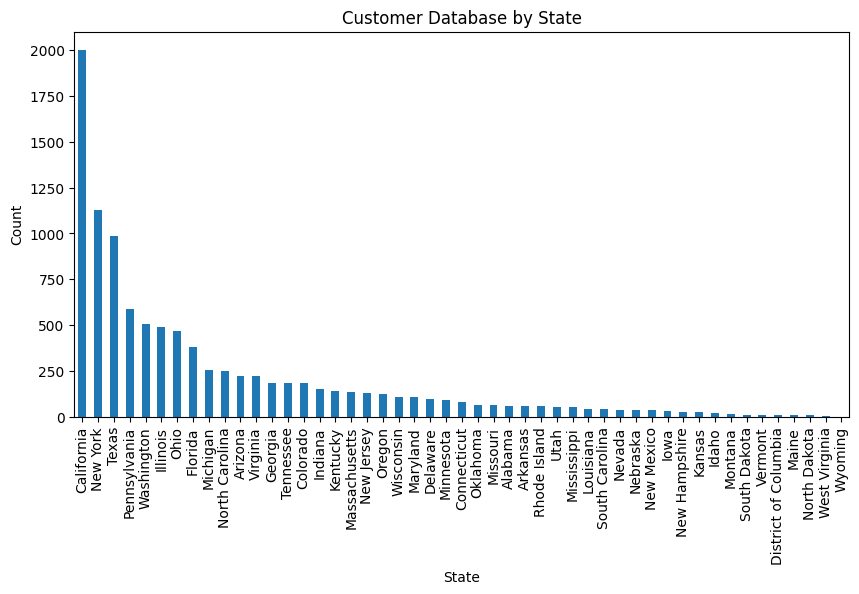

Plot saved as 'customer_database_by_state.png'


In [ ]:
# Plot the customer database by state
df['State'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Customer Database by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Save the plot as an image file before showing the plot
plt.savefig('customer_database_by_state.png', bbox_inches='tight')

# Now you can display the plot
plt.show()

print("Plot saved as 'customer_database_by_state.png'")

In [ ]:
pip install pandas openpyxl

In [ ]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Filter data for the years 2019 & 2020
df = df[(df['Order Date'].dt.year == 2019) | (df['Order Date'].dt.year == 2020)]

# Filter data for the states California, New York, and Texas
df = df[df['State'].isin(['California', 'New York', 'Texas'])]

# Add a 'Year' and 'Month' column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by 'Year', 'Category' and calculate mean 'Sales'
report = df.groupby(['Year', 'Category'])['Sales'].mean().reset_index()

# Pivot the report to have years as columns
report_pivot = report.pivot(index='Category', columns='Year', values='Sales')

# Calculate the difference between the sales of the two years
report_pivot['Sales Difference'] = report_pivot[2020] - report_pivot[2019]

# Save the report as an Excel file
report_pivot.to_excel('sales_difference_by_category.xlsx')

print("Report saved as 'sales_difference_by_category.xlsx'")
+

Report saved as 'sales_difference_by_category.xlsx'


In [13]:
# prompt: create Product table from Sample super store sheet with the following columns  'Product ID', Product Name, Category , Sub Category

sales_table = df[['Order ID', 'Manager ID', 'Address ID', 'Sales', 'Segment', 'Quantity', 'Profit', 'Discount']]

# Drop any rows with missing values
sales_table.dropna(inplace=True)

# Save the Product table to a new Excel file
sales_table.to_csv('sales_table.csv', index=False)




KeyError: "['Manager ID', 'Address ID'] not in index"